<a href="https://colab.research.google.com/github/oyendrila-dobe/IntroToZ3/blob/main/IntroToZ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Z3

## What is Z3?

Z3 Theorem Prover (aka Z3) is a solver for systems of equations. It can find solutions to a wide variety of problems or especially, automatically prove that solution to a problem cannot exist. It is itself not a new language but a library/framework/API to express and solve systems of equations. 

### Application (less serious to more serious)
- Riddles and puzzles 
- Resource allocation 
- Software verification (ask Borzoo for details, if you are interested)
- Optimizing tax for investment options, etc.

Our aim by the end of this tutorial would be to be able to represent or prove logical statements or equivalences that we have already learnt.

Additionally, if you are interested, I have added the code with minor explainations of how to encode and solve this (or any) sudoku puzzle using Z3. Play around with it!

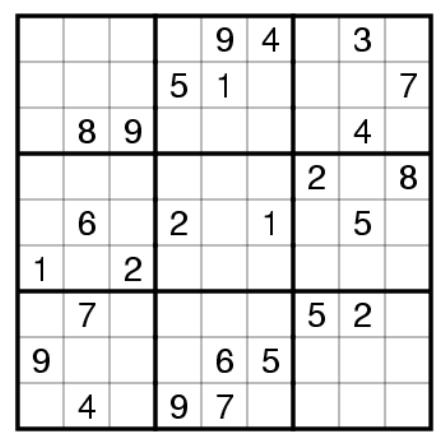


### Simple beginner examples
Let's begin by installing Z3 and importing the relevant library. You can use the python package installer **pip**. Be mindful of the name - z3 on pip is whole different library. We will be using **z3-solver**.

In [ ]:
!pip install z3-solver 

When importing the library, the name is **z3**.

In [4]:
from z3 import *

### Example 1: From assignment 1, Q6a
Let's see if $((\neg p \vee \neg q) \wedge (p \vee q)) \wedge (p \vee \neg q)$ is satisfiable. I have added an extra pair of brackets to make it less confusing to code later but it does not affect our answer!

We'll start by declaring the variables $p,q$.

In [5]:
p = Bool('p') # creates a Boolean variable in Z3 named p.
variable_q = Bool('q') # note that your variable name and the Z3 name does not have to be the same.

Next we will create a general purpose solver, add our constraints, and ask it to solve them for us.

In [6]:
mySolver = Solver()

There is a specific way to express Boolean operations in Z3.
* Conjunction: $x \wedge y$ is written as And(x,y).
* Disjunction: $x \vee y$ is written as Or(x,y).
* Negation: $\neg x$ is written as Not(x).
* Implication: $x \rightarrow y$ is written as Implies(x,y).
* Bi-implication: $x \leftrightarrow y$ is written as x == y.

They can be combined with one other 

Using this let's try to encode our assignment problem and add it to our solver. Notice that we are using our variable names and not their Z3 names in our equations. 

$(\neg p \vee \neg q)$ would be *Or(Not(p),Not(variable_q))*.

$(p \vee q)$ would be *Or(p, variable_q)*

$(p \vee \neg q)$ would be *Or(p, Not(variable_q))*

Combining these with the conjunctions we get:

In [7]:
mySolver.add(And(And(Or(Not(p),Not(variable_q)),Or(p,variable_q)),Or(p, Not(variable_q))))

So, our job here is done. Let's see how to get the solver to work and get the results.       

In [ ]:
print(mySolver.check()) # this will return sat if our constraints are satisfiable and unsat otherwise
print(mySolver.model()) # this will return the value that our p and variable_q can assume to satisfy all the constraint
# Note that it prints the Z3 name and not the name of our variable, i.e., it prints **q** and not **variable_q**

Interestingly, when we provide Z3 with multiple equations or statements, it assumes **all of them** have to be be true. Hence, it internally adds an **AND** between each constraint. So we can alternatively encode the above equation as:

In [9]:
mySolver1 = Solver()
mySolver.add(Or(Not(p),Not(variable_q)))
mySolver.add(Or(p,variable_q))
mySolver.add(Or(p, Not(variable_q)))         

In [ ]:
print(mySolver.check()) # this will return sat if our constraints are satisfiable and unsat otherwise
print(mySolver.model()) # this will return the value that our p and variable_q can assume to satisfy all the constraint
# Note that it prints the Z3 name and not the name of our variable, i.e., it prints **q** and not **variable_q**

We can additionally write them at one go without creating an explicit Solver object. Solve here creates the Solver object internally, gets the model and prints it.

In [ ]:
solve(And(And(Or(Not(p),Not(variable_q)),Or(p,variable_q)),Or(p, Not(variable_q))))

### Example 2: From assignment 1, Q6b
Let's see if $(p \rightarrow q)\wedge(p\rightarrow \neg q)\wedge(\neg p \rightarrow q)\wedge(\neg p 
\rightarrow \neg q)$ is satisfiable.

We'll start by instantiating a new solver and declaring the variables $p,q$. Note that adding the new constraints to the old solver would mean that we adding them alongwith the previous constraints which isn't our intention.

In [12]:
myNewSolver = Solver()
p = Bool('p')
q = Bool('q')

Let's encode them as seperate constraints.

In [ ]:
mySolver.add(Implies(p,q))
mySolver.add(Implies(p,Not(q)))
mySolver.add(Implies(Not(p),q))
mySolver.add(Implies(Not(p),Not(q)))

print(mySolver.check()) # this should return unsat
#print(mySolver.model())     Note that if we try to print a model this will produce an error since the model is non-exdistent

We can re-write this in one line too. 

In [ ]:
solve(Implies(p,q), Implies(p,Not(q)), Implies(Not(p),q), Implies(Not(p),Not(q)))

### Example 3: From assignment 1, Q6c
Let's see if  $(𝑝\leftrightarrow 𝑞)∧(¬𝑝\leftrightarrow 𝑞)$  is satisfiable. Notice how we added comma between constraints in the *solve* line and it takes the input as seperate constraints.

In [ ]:
myNewSolver = Solver()
p = Bool('p')
q = Bool('q')

solve ((p==q), Not(p)==q)

### Example 4: Checking our equivalence rules were correct!

Let's see if De Morgan's rule is correct, i.e.,
$\neg(p \vee q) ≡ \neg p ∧ \neg q$ 

In [ ]:
p = Bool('p')
q = Bool('q')

my_true_theorem = Not(Or(p,q)) == And(Not(p), Not(q))
my_true_theorem # just to confirm we typed it right

In [ ]:
prove(my_true_theorem)

How about we tweak it a little.

In [ ]:
my_false_theorem = Not(Or(p,q)) == Or(Not(p), Not(q))
my_false_theorem

In [ ]:
prove(my_false_theorem)

Can you try to encode the first question on your mid-term?

'*The crop is good, but there is not enough water. If there is a lot of rain or
not a lot of sun, then there is enough water. Therefore the crop is good and
there is a lot of sun*'.

In [22]:
crop = Bool('cr') # crop = true if crop is good
water = Bool('wa') # water = true if there is enough water
rain = Bool('ra') # rain = true if there is a lot of rain
sun = Bool('su') # sun = true if there is a lot of sun

# enter your constraints or theorem below



In [ ]:
#@title Check the solution
my_th = Implies(And(And(crop,Not(water)),Implies(Or(rain, Not(sun)), water)), And(crop, sun))
my_th
prove(my_th)

#### Play around with any of the previous problem to see if you can encode it in Z3!



## (NOT COMPULSORY) Time for SUDOKU!

*Caution: This section contains a few thorns (advanced concepts). If you ready for adventure, keep going!*

Sudoku is one of the most popular puzzles. The goal is to insert the numbers in the boxes to satisfy only one condition: each row, column and 3x3 box must contain the digits 1 through 9 exactly once.


The following example encodes the suduko problem in Z3. Different sukudo instances can be solved by modifying the matrix instance. This example makes heavy use of [list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) available in the Python programming language.

Few pointers:
- Just like Bool() defines a boolean variable Int() defines an integer variable.
- Distinct(x,y) is a special constraint that ensures x,y are assigned different value.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# sudoku instance, we use '0' for empty cells
'''
instance = ((0,0,0,0,9,4,0,3,0),
            (0,0,0,5,1,0,0,0,7),
            (0,8,9,0,0,0,0,4,0),
            (0,0,0,0,0,0,2,0,8),
            (0,6,0,2,0,1,0,5,0),
            (1,0,2,0,0,0,0,0,0),
            (0,7,0,0,0,0,5,2,0),
            (9,0,0,0,6,5,0,0,0),
            (0,4,0,9,7,0,0,0,0))
'''

# instance that will fail

instance = ((0,0,0,0,9,4,0,3,0),
            (0,0,0,5,1,0,0,0,7),
            (0,8,9,0,0,0,0,4,0),
            (0,0,0,0,0,0,2,0,8),
            (0,6,0,2,0,1,0,5,0),
            (1,0,2,0,0,0,0,0,0),
            (0,7,0,0,0,0,5,3,0),
            (9,0,0,0,6,5,0,0,0),
            (0,4,0,9,7,0,0,0,0))


# 9x9 matrix of integer variables. We are making a List of lists corresponding to each variable in the Sudoku board.
# We name each variable using the string "x_%s_%s", e.g., the variable for 1st row, 3rd column would be named "x_1_3"
# We are looping from 0-8 here, hence using i+1, j+1 to generate variables for each cell in the sudoku board.
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(9) ] 
      for i in range(9) ] 

# each cell contains a value in {1, ..., 9}
# we loop through all the variables, and say that the value of each of them has to be in [1,9]
cells_c  = [ And(1 <= X[i][j], X[i][j] <= 9) 
             for i in range(9) for j in range(9) ]

# each row contains a digit at most once
rows_c   = [ Distinct(X[i]) for i in range(9) ]

# each column contains a digit at most once
cols_c   = [ Distinct([ X[i][j] for i in range(9) ]) 
             for j in range(9) ]

# each 3x3 square contains a digit at most once
sq_c     = [ Distinct([ X[3*i0 + i][3*j0 + j] 
                        for i in range(3) for j in range(3) ]) 
             for i0 in range(3) for j0 in range(3) ]

sudoku_c = cells_c + rows_c + cols_c + sq_c

# adding the above grid as a constraint too
instance_c = [ If(instance[i][j] == 0, 
                  True, 
                  X[i][j] == instance[i][j]) 
               for i in range(9) for j in range(9) ]

s = Solver()
s.add(sudoku_c + instance_c)
if s.check() == sat:
    m = s.model()
    r = [ [ m.evaluate(X[i][j]) for j in range(9) ] 
          for i in range(9) ]
    print_matrix(r)
else:
    print("failed to solve")

## Acknowledgements and Extra Reading

This introductory tutorial has been inspired by extensive tutorials already available. These links additionally have a lot more materials to help you deep dive into Z3:

- [Philip Zucker's tutorial](https://github.com/philzook58/z3_tutorial) is a great resource for a bigger overview on Z3.
- The [course material page](https://theory.stanford.edu/~nikolaj/programmingz3.html) of one of the main developer of Z3.
- I have shamelessly copied the optimized sudoku code from this [course page](http://www.cs.tau.ac.il/~msagiv/courses/asv/z3py/guide-examples.htm).
- Cool problems Z3 can be used to solve along with their code can be found [here](https://www.keiruaprod.fr/blog/2021/05/09/z3-samples.html).
